<a href="https://colab.research.google.com/github/hyunicecream/ML-DL/blob/main/%08AutoEncoder%20CNN(Mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Autoencoder를 이용한 차원 축소 예시
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# mnist 데이터를 다운로드한다
(d_train, y_train), (d_test, y_test) = mnist.load_data()
d_train.shape, y_train.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

In [ ]:
# input data를 생성한다.
x_train = d_train / 255
x_train = x_train.reshape(-1, 28, 28, 1) # CNN 입력을 위해 channel 축을 추가한다.

In [ ]:
# CNN AutoEncoder
n_height = x_train.shape[1]
n_width = x_train.shape[2]

x_input = Input(batch_shape = (None, n_height, n_width, 1))

# encoder
# (28, 28) 이미지를 (14, 14) 이미지로 줄인다.
e_conv = Conv2D(filters=10, kernel_size= (5,5), strides=1, padding='same', activation='relu')(x_input)
e_pool = MaxPooling2D(pool_size = (5, 5), strides=1, padding='same')(e_conv)
e_flat = Flatten()(e_pool)
e_latent = Dense(14 * 14)(e_flat) # (28, 28) -> (14, 14)로 축소
e_latent = Reshape((14, 14, 1))(e_latent)

# decoder
# 이미지를 strides = 2 배 만큼 늘린다. 결과 = (20, 8) : 원본 이미지
d_conv = Conv2DTranspose(filters=10, kernel_size=(10, 10), strides=2, padding='same', activation='relu')(e_latent)
y_output = Conv2D(1, kernel_size=(6, 4), strides=1, padding = 'same')(d_conv)
model = Model(x_input, y_output)
model.compile(loss='mse', optimizer=Adam(learning_rate=0.005))
encoder = Model(x_input, e_latent)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 10)        260       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 10)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7840)              0         
                                                                 
 dense (Dense)               (None, 196)               1536836   
                                                                 
 reshape (Reshape)           (None, 14, 14, 1)         0         
                                                             

In [ ]:
# autoencoder를 학습한다
hist = model.fit(x_train, x_train, epochs=50, batch_size=1024)

Epoch 1/50
59/59 [==============================] - 16s 110ms/step - loss: 0.0849
Epoch 2/50
59/59 [==============================] - 6s 109ms/step - loss: 0.0468
Epoch 3/50
59/59 [==============================] - 7s 110ms/step - loss: 0.0283
Epoch 4/50
59/59 [==============================] - 6s 110ms/step - loss: 0.0195
Epoch 5/50
59/59 [==============================] - 6s 107ms/step - loss: 0.0156
Epoch 6/50
59/59 [==============================] - 6s 104ms/step - loss: 0.0131
Epoch 7/50
59/59 [==============================] - 6s 101ms/step - loss: 0.0117
Epoch 8/50
59/59 [==============================] - 6s 105ms/step - loss: 0.0105
Epoch 9/50
59/59 [==============================] - 6s 105ms/step - loss: 0.0096
Epoch 10/50
59/59 [==============================] - 6s 106ms/step - loss: 0.0090
Epoch 11/50
59/59 [==============================] - 6s 108ms/step - loss: 0.0085
Epoch 12/50
59/59 [==============================] - 7s 116ms/step - loss: 0.0080
Epoch 13/50
59/59 [=====

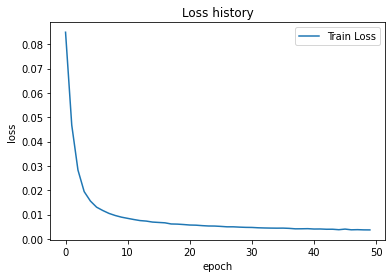

In [ ]:
# Loss history를 그린다
plt.plot(hist.history['loss'], label='Train Loss')
plt.legend()
plt.title("Loss history")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
# 학습된 autoencoder를 이용하여 입력 데이터의 차원을 축소한다.
x_encoded = encoder.predict(x_train).reshape(-1, 14 * 14)

In [ ]:
# K-means++ 알고리즘으로 차원이 축소된 이미지를 10 그룹으로 분류한다.
km = KMeans(n_clusters=10, init='k-means++', n_init=3, max_iter=300, tol=1e-04, random_state=0)
km = km.fit(x_encoded)
clust = km.predict(x_encoded)

<Figure size 576x144 with 0 Axes>

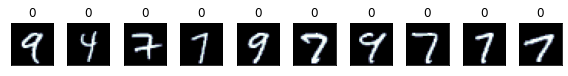

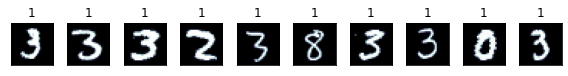

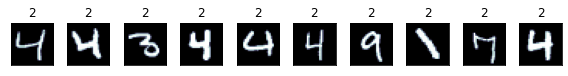

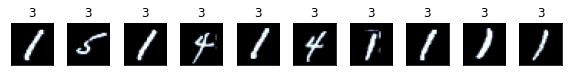

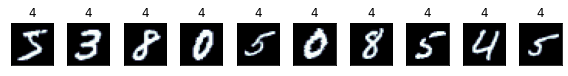

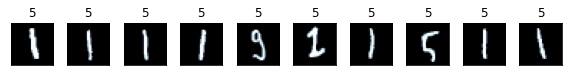

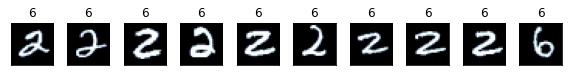

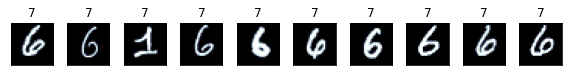

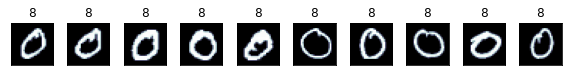

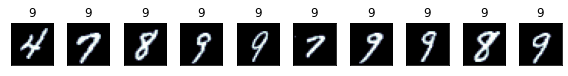

In [ ]:
# cluster 별로 이미지를 확인한다.
f = plt.figure(figsize=(8, 2))
for k in np.unique(clust):
    # cluster가 i인 imageX image 10개를 찾는다.
    idx = np.where(clust == k)[0][:10]
    
    f = plt.figure(figsize=(8, 2))
    for i in range(10):
        image = x_train[idx[i]].reshape(28,28)
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(image, cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(k)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()

In [ ]:
x_encoded.shape

(60000, 196)

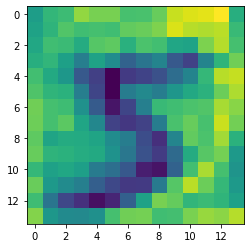

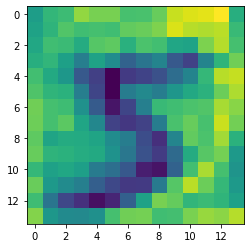

In [ ]:
plt.imshow(x_encoded[0].reshape(14,14))

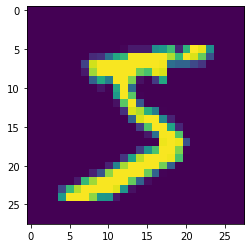

In [ ]:
plt.imshow(x_train[0].reshape(28,28))